# Prediction of circular discontinuity in mesh C

In [1]:
from fonction import *
from models import *

Using TensorFlow backend.


In [2]:
# Parameter 
modifie_angle = True 
modifie_loss = True
batch = 1000

Meshs_train = ["mesh_C"]
Architectures = [build_model_24_cust_loss_sig ,build_model_40_cust_loss_sig,build_model_84_cust_loss_sig ]
Data_sets = [ "data_set_p_2_all.csv","data_set_p_3_all.csv","data_set_p_5_all.csv" ]
data_test = ["data_test_all_p2_circle.csv","data_test_all_p3_circle.csv","data_test_all_p5_circle.csv"]

===================NN architecture==========================
=======================training=============================
Epoch 01825: early stopping
MSE modifie Test: 0.024
========================Summary=============================
all value are in degree 
 the error mean is :  6.4721046889671285
 the error std is :  5.958667236078694
 the median is :  4.7941666688818465
 the max is :  149.30503375611517
 the min is :  0.00012031174891546925
 the accuracy up to 1    degree is :  11.56  %
 the accuracy up to 5    degree is :  51.66  %
 the accuracy up to 10    degree is :  79.25  %
MSE Train: 0.023 | MSE Test: 0.024 


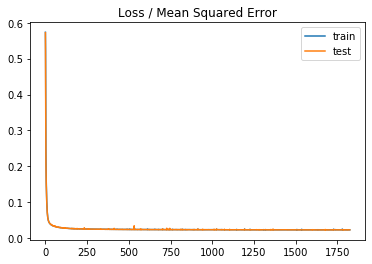

Training time is : 7.38  minute
loading data ... 
loading succed
on a new mesh the loss is : nan
on a new mesh the modifie mse is : nan
========================Summary=============================
all value are in degree 
 the error mean is :  nan
 the error std is :  nan
 the median is :  nan
 the max is :  nan
 the min is :  nan
 the accuracy up to 1    degree is :  0.0  %
 the accuracy up to 5    degree is :  0.0  %
 the accuracy up to 10    degree is :  0.0  %
saving prediction ...
saving succed


C:\Users\pierr\Desktop\Projet de semestre I\NN_pyhton_code\fonction.py:22: RuntimeWarning: invalid value encountered in less
  indice_neg = np.where(data[:,-1]<0)[0]
C:\Users\pierr\Desktop\Projet de semestre I\NN_pyhton_code\fonction.py:71: RuntimeWarning: invalid value encountered in greater
  if np.abs(y_p-y_true[ind_y]) > np.abs(y_true[ind_y] -(y_p+np.pi)):
C:\Users\pierr\Desktop\Projet de semestre I\NN_pyhton_code\fonction.py:74: RuntimeWarning: invalid value encountered in greater
  if np.abs(y_p-y_true[ind_y]) > np.abs(y_true[ind_y] -(y_p-np.pi)):
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\pierr\Desktop\Projet de semestre I\NN_pyhton_code\fonction.py:107: RuntimeWarning: invalid value encountered in less
  accuracy_1    = round(((np.where(error < 1)[0].shape[0])/nbr_value)*100,2)
C:\Users\pierr\Desktop\Projet de semestre I\NN_pyhton_code\fonction.py:108: RuntimeWa

===================NN architecture==========================
=======================training=============================


KeyboardInterrupt: 

In [3]:
for index , data_set in enumerate(Data_sets):
    data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\discontinuity_R\\'+Meshs_train[0]+'\\'+data_set
    # load the data 
    data = np.loadtxt(data_path, delimiter=',')
    data= data[:,1:]
    # to make every model the same number of train and test in order to compare
    X_train, X_test_, Y_train, Y_test_, indice_neg_data = data_preparation(data, modifie_angle)
    model_, train_mse , test_mse,results = training_NN(Architectures[index],X_train, X_test_, Y_train, Y_test_,patience_ = 100,batch = batch,modifie_loss =modifie_loss )
    data_path = "C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\discontinuity_R\\mesh_C\\"+data_test[index]
    output_path = "\data\pred_"+data_test[index]
    prediction_on_new_grid(data_path,output_path,model_,modifie_loss = modifie_loss)